# <center> RMOC (y,T) </center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
from useful import *
import layers_calc
sys.path.append('/noc/users/hb1g13/Python/python_functions/MITgcmUtils/')
import utils
%matplotlib inline

In [2]:
# File name
Year = 'PSI.nc'

In [3]:
# Find Path and Grid 
#tau = ['3','10','30','100','300','1000','3000','10000','Closed']
tau = ['3','300','3000','Closed']
Figletter = ['a) ', 'b) ', 'c) ', 'd) ', 'e) ',
             'f) ', 'g) ', 'h) ', 'i) ']
x = '/noc/msm/scratch/students/hb1g13/Mobilis'
check=0
runs=[]
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'daynokpp/'+Year
    if not os.path.exists(flist):
        print ('WARNING: '+flist+
               ' does not exist!(skipping this tau...)')
        check += 0
    else:
        check += 1
        runs.append(i)   
Runs=np.array(runs)

In [4]:
SAMW = []
NADW = []
AABW = []
Tau = []
Psi_levs = np.arange(-2.1, 2.1, .31)
Psi_ticks =np.arange(-2., 2., .5)

\begin{equation}
\psi_{res}(y, \theta)= \frac{1}{\Delta t} \int_{t_o}^{t_{o}+\Delta t} \int_{0}^{L_x}  \int_{\theta}^{0} vh \,\mathrm{d}\theta \,\mathrm{d}x\,\mathrm{d}t,
\end{equation} 

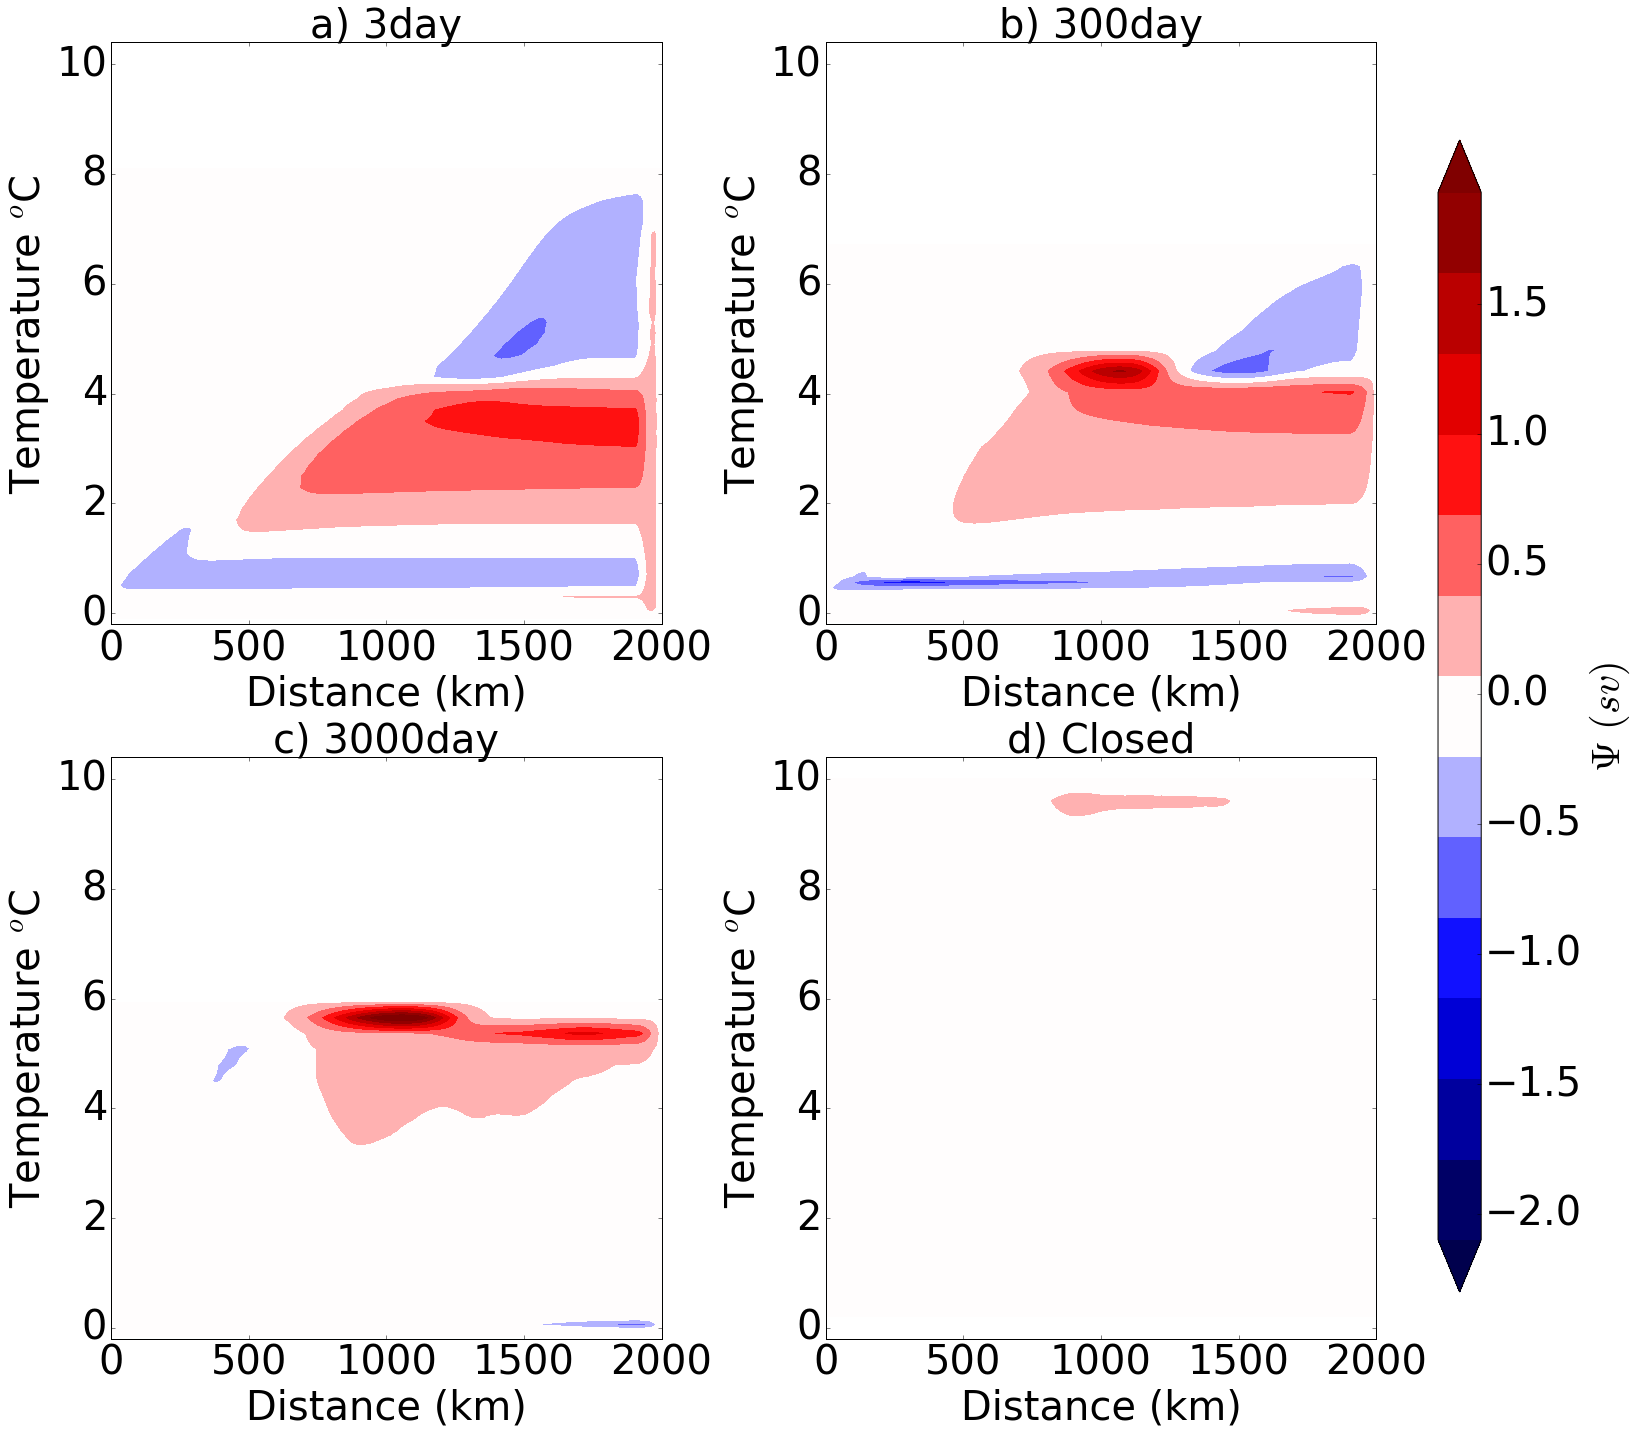

In [6]:
fig=plt.figure(figsize=(20.0,20.0))
for i in range(len(Runs)):
    if tau[Runs[i]]=='Closed':
        Tau.append(100000)
    else:
        Tau.append(tau[Runs[i]])
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    g = layers_calc.LayersComputer(c)
    Rho = g.glvl
    psi = c.get_psi_iso()/10**6
    PIs = c.mnc('PSI.nc',"LaPs1TH").mean(axis=2) 
    y = c.yg/1000
    if len(Runs)>4:
        ax = fig.add_subplot(3, 3, i+1)
    else:
        ax = fig.add_subplot(2, 2, i+1)
    SAMW.append(np.min(psi[17::,-150:-50]))
    NADW.append(np.max(psi[5:17,-100]))
    AABW.append(np.min(psi[0:6,-175]))
    p = ax.contourf(y,Rho,psi,Psi_levs,cmap=plt.cm.seismic,extend='both') #Use b2r colourmap
    plt.ylim(-0.2,10.4)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day',fontsize=40)
    if str(tau[Runs[i]])=='Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]),fontsize=40)
    ax.set_xlabel('Distance (km)',fontsize=40)
    ax.set_ylabel('Temperature $^o$C',fontsize=40)
    ax.tick_params(axis='both', which='major', labelsize=40)
plt.tight_layout()
# Add Colorbar
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax,ticks=Psi_ticks)
cbar.ax.set_ylabel('$\Psi \,\, (sv)$',fontsize=40)
cbar.ax.tick_params(labelsize=40)

In [ ]:
c.ddy_cgrid_centered

In [97]:
Psi_levs = np.arange(-2.5, 2.5, .21)
Psi_ticks =np.arange(-2.5, 2.5, .5)

In [5]:
fig=plt.figure(figsize=(20.0,20.0))
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    g = layers_calc.LayersComputer(c)
    Rho = g.glvl
    lvrho , th = g.compute_vflux()
    V = lvrho.mean(axis=2)
    psi = -V.cumsum(axis=0)*c.Lx/10**6
    y = c.yc/1000
    if len(Runs)>4:
        ax = fig.add_subplot(3, 3, i+1)
    else:
        ax = fig.add_subplot(2, 2, i+1)
    p = ax.contourf(y,Rho,psi,Psi_levs,cmap=plt.cm.seismic) #Use b2r colourmap
    plt.ylim(-0.2,10.4)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day',fontsize=40)
    if str(tau[Runs[i]])=='Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]),fontsize=40)
    ax.set_xlabel('Distance (km)',fontsize=40)
    ax.set_ylabel('Temperature $^o$C',fontsize=40)
    ax.tick_params(axis='both', which='major', labelsize=40)
plt.tight_layout()
# Add Colorbar
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax,ticks=Psi_ticks)
cbar.ax.set_ylabel('$\Psi \,\, (sv)$',fontsize=40)
cbar.ax.tick_params(labelsize=40)

/noc/users/hb1g13/Python/python_functions/layers_calc.py:135: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  h[layer_idx[kk]] += dzzf[kk]
/noc/users/hb1g13/Python/python_functions/layers_calc.py:136: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  uh[layer_idx[kk]] += dzzf[kk] * uzz[kk]


KeyboardInterrupt: 

/noc/msm/scratch/students/hb1g13/Mobilis/3daynokpp/
/noc/msm/scratch/students/hb1g13/Mobilis/300daynokpp/
/noc/msm/scratch/students/hb1g13/Mobilis/3000daynokpp/
/noc/msm/scratch/students/hb1g13/Mobilis/Closeddaynokpp/


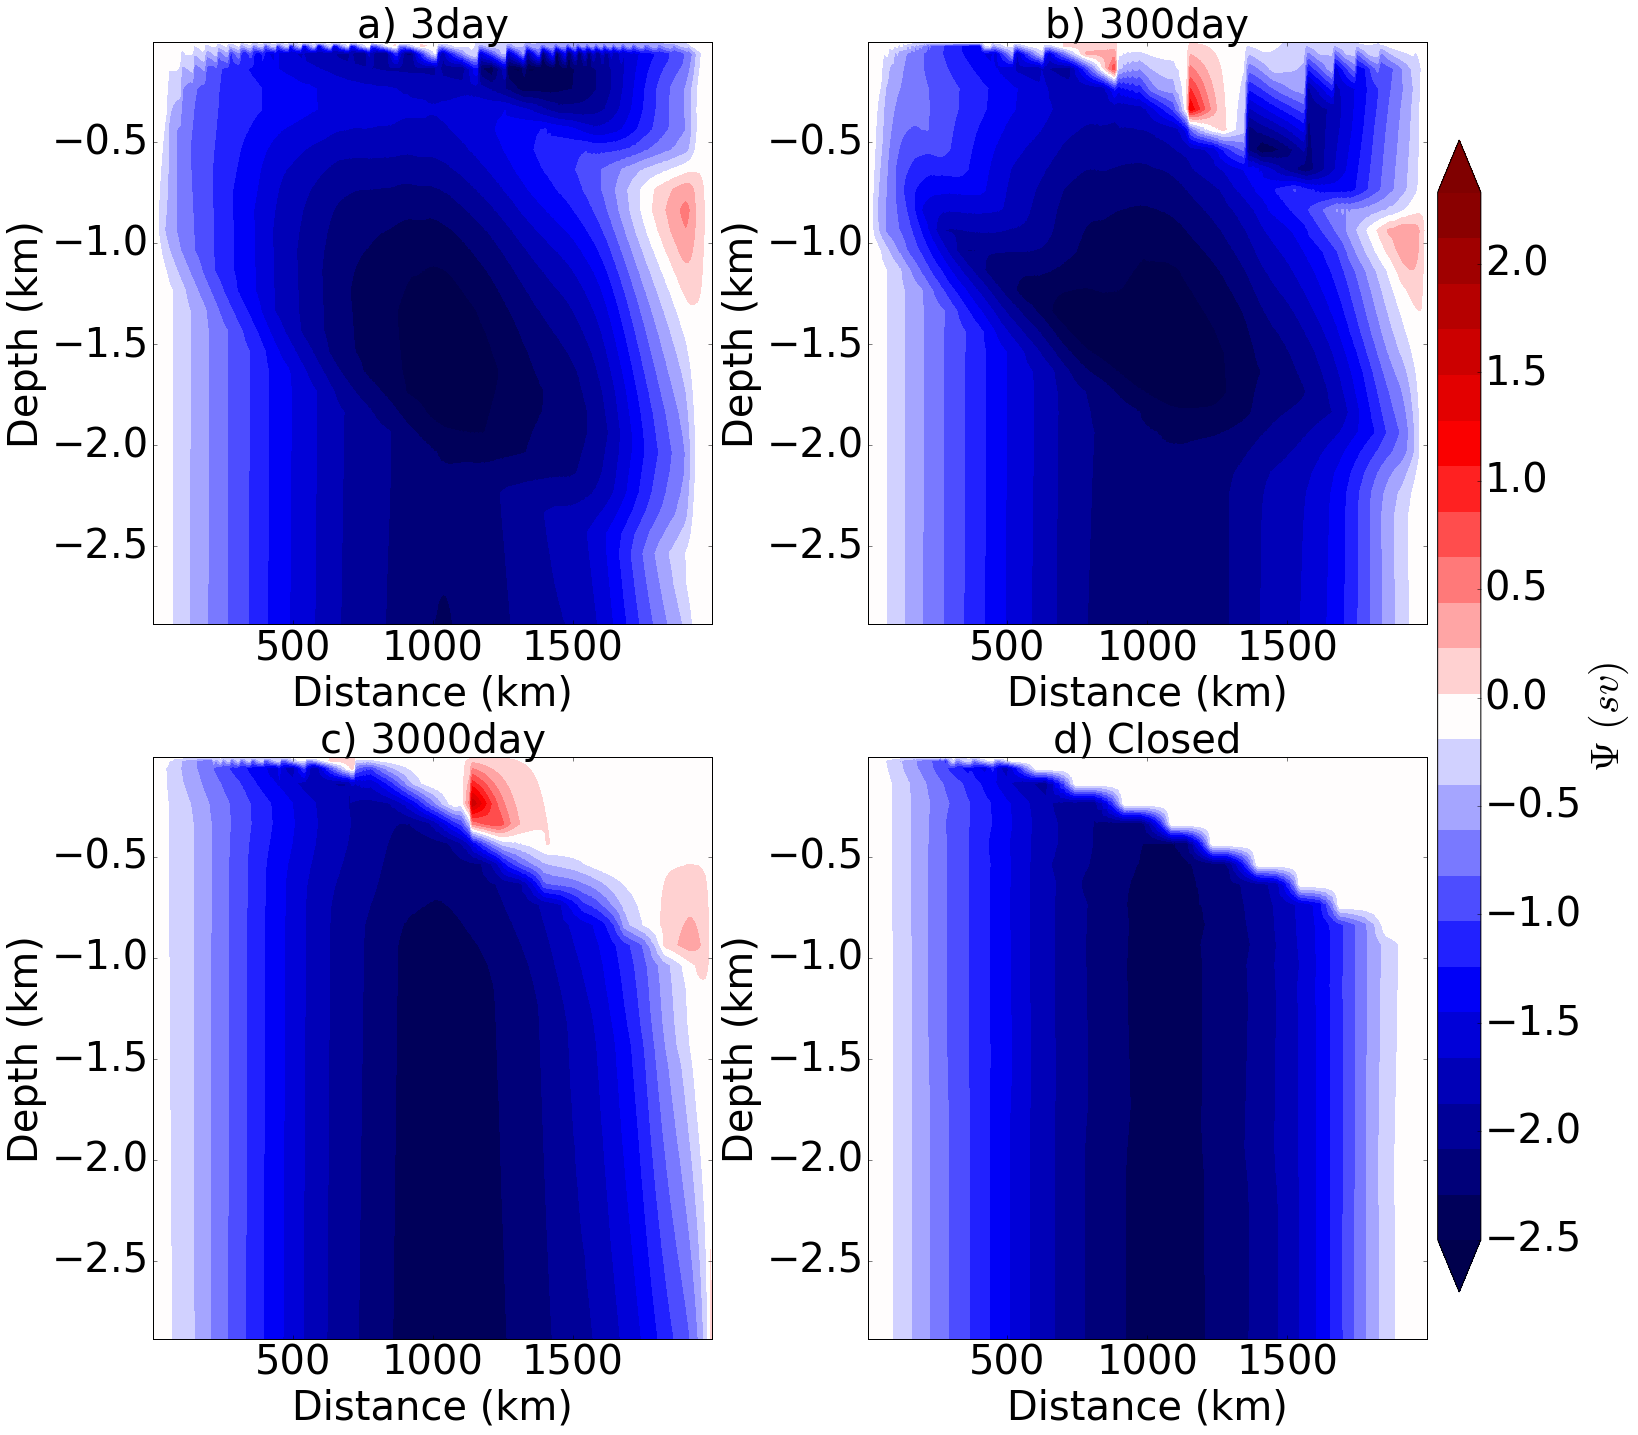

In [71]:
fig=plt.figure(figsize=(20.0,20.0))
for i in range(len(Runs)):
    if tau[Runs[i]]=='Closed':
        Tau.append(100000)
    else:
        Tau.append(tau[Runs[i]])
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    g = layers_calc.LayersComputer(c)
    lvrho , th = g.compute_vflux()
    V = lvrho.mean(axis=2)
    psi = -V.cumsum(axis=0)*c.Lx/10**6
    psied = c.vgrid_to_cgrid(c.get_psi_iso()/10**6) - psi
    y = c.yc/1000
    if len(Runs)>4:
        ax = fig.add_subplot(3, 3, i+1)
    else:
        ax = fig.add_subplot(2, 2, i+1)
    p = ax.contourf(y,c.zc/1000,g.transform_g_to_z(psied,th.mean(axis=2)),
                    Psi_levs,cmap=plt.cm.seismic,extend='both') #Use b2r colourmap
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day',fontsize=40)
    if str(tau[Runs[i]])=='Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]),fontsize=40)
    ax.set_xlabel('Distance (km)',fontsize=40)
    ax.set_ylabel('Depth (km)',fontsize=40)
    ax.tick_params(axis='both', which='major', labelsize=40)
plt.tight_layout()
# Add Colorbar
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax,ticks=Psi_ticks)
cbar.ax.set_ylabel('$\Psi \,\, (sv)$',fontsize=40)
cbar.ax.tick_params(labelsize=40)

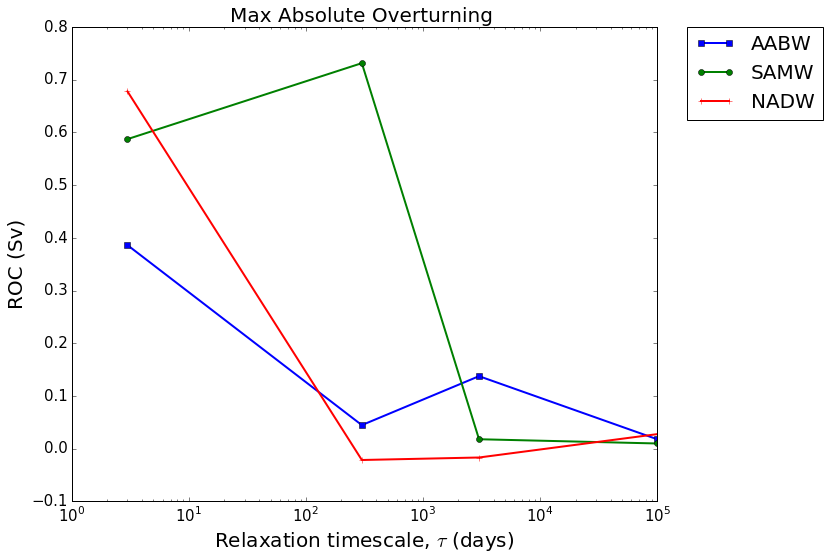

In [117]:
plt.figure(figsize=(10.5, 8.5))
Relax = np.array(Tau)
aabw = np.array(AABW)
nadw = np.array(NADW)
samw = np.array(SAMW)
plt.semilogx(Relax,abs(aabw),c='b', marker='s',label='AABW',linewidth=2) 
plt.semilogx(Relax,abs(samw),c='g', marker='o',label='SAMW',linewidth=2)
plt.semilogx(Relax,nadw,c='r', marker='+',label='NADW',linewidth=2)
plt.title("Max Absolute Overturning ", fontsize=20)
plt.xlabel(r'Relaxation timescale, $\tau$ (days)', fontsize=20)
plt.ylabel('ROC (Sv)', fontsize=20)
plt.tick_params(labelsize=15)
#plt.xscale('log')
lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)